In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Thử nghiệm trên đoạn test tự viết

## 1.  Cài đặt thư viện SimCTG và tải mô hình GPT-2 tiếng Việt

In [ ]:
# ! SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True pip install simctg --upgrade

In [ ]:
%cd /content/drive/MyDrive/NLP/SimCTG/pretraining

/content/drive/.shortcut-targets-by-id/1gesrWzv6zLxGIKi9f-n1Fx5jDxeGs-J7/SimCTG/pretraining


In [ ]:
import torch
from simctg import SimCTGPretraining
#import simgctg từ tập file được tải từ github về gg drive,
# Lưu ý cần cd đến đúng vị trí file cần import để tránh lỗi trùng file name

In [ ]:
# Tải mô hình GPT-2 tiếng Việt từ Hugging Face (https://huggingface.co/NlpHUST/gpt2-vietnamese)
model_path = 'NlpHUST/gpt2-vietnamese'
model = SimCTGPretraining(model_path)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/854k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/512k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Further pre-train with available parameters.


config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

SimCTGPretraining(
  (model): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(50257, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.0, inplace=False)
      (h): ModuleList(
        (0-11): 12 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2SdpaAttention(
            (c_attn): Conv1D()
            (c_proj): Conv1D()
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): GPT2MLP(
            (c_fc): Conv1D()
            (c_proj): Conv1D()
            (act): NewGELUActivation()
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
      )
      (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (lm_head): Linear(in_features=768, out_features=50257, bias=False)
  )
  (logsftmax): LogSoftmax(

## 2. Thử nghiệm trên trên đoạn test nhỏ

In [ ]:
text = '''Trong một tương lai gần, công nghệ AI sẽ được sử dụng để cải thiện
nhiều lĩnh vực khác nhau.'''

tokens = model.tokenizer.tokenize(text) # Phân tách thành các token
input_ids = model.tokenizer.convert_tokens_to_ids(tokens) # Chuyển đổi token thành ID
input_ids = torch.LongTensor(input_ids).view(1, -1) # Tạo tensor từ các ID

In [ ]:
# (1) use contrastive search to generate the result
beam_width, alpha, decoding_len = 3, 0.6, 124
eos_token = model.tokenizer.eos_token
contrastive_output = model.fast_contrastive_search(input_ids, beam_width, alpha, decoding_len, eos_token)
print(contrastive_output)

Trong một tương lai gần, công nghệ AI sẽ được sử dụng để cải thiện 
nhiều lĩnh vực khác nhau. Trong đó, có thể kể đến như trí tuệ nhân tạo (AI) và robot. AI là công nghệ có khả năng thay đổi hành vi của con người, từ đó tạo ra những sản phẩm có tính cạnh tranh cao hơn. Tuy nhiên, AI cũng có thể gây ra những tác động tiêu cực đối với môi trường, thậm chí đe dọa sự tồn tại của các loài động vật trong tự nhiên.
Theo các chuyên gia, AI có thể giúp con người có thể tự nhận thức và điều khiển các hoạt động của mình thông qua các thiết bị di động. AI có thể giúp con người có thể nhận


In [ ]:
# (2) use nucleus sampling to generate the result
nucleus_p, decoding_len = 0.95, 124
eos_token = model.tokenizer.eos_token
nucleus_output = model.nucleus_sampling(input_ids, nucleus_p, decoding_len, eos_token)
print (nucleus_output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Trong một tương lai gần, công nghệ AI sẽ được sử dụng để cải thiện 
nhiều lĩnh vực khác nhau. Trong số các lĩnh vực đó, trong những lĩnh vực mà công nghệ thích nghi tốt nhất, công nghệ mới nhất, được sử dụng bởi tất cả các...	
Blockchain tạo ra khá nhiều thay đổi về việc giao dịch, hoạt động kinh doanh và làm việc nhanh chóng. Thuật toán kết hợp...	
Quá trình loại bỏ các giao diện lộn xộn là một trong những công cụ quan trọng được sử dụng để xây dựng một hệ thống thông...	
Xu hướng phát triển chung của công nghệ blockchain để giúp cải thiện các cơ chế trong việc quản lý các thay đổi trong các...	
Hiện nay,


In [ ]:
# (3) use greedy search to generate the result
decoding_len = 124
eos_token = model.tokenizer.eos_token
greedy_output = model.greedy_search(input_ids, decoding_len, eos_token)
print (greedy_output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Trong một tương lai gần, công nghệ AI sẽ được sử dụng để thay thế cho các thuật toán tự động hóa trong các lĩnh vực như giao thông, y tế, giáo dục, giao thông vận tải, giao thông vận tải và các lĩnh vực khác.
Các nhà nghiên cứu tại Đại học Cambridge, Anh, đã phát triển một loại máy có thể nhận diện các vật thể di động, có thể di chuyển trong vòng vài giây.
Các nhà nghiên cứu tại Đại học Cambridge, Anh, đã phát triển một loại máy có thể nhận diện các vật thể di động, có thể di chuyển trong vòng vài giây.
Các nhà nghiên cứu tại Đại học Cambridge, Anh,


In [ ]:
# (4) use beam search to generate the result
beam_width, decoding_len = 10, 124
eos_token = model.tokenizer.eos_token
beam_output = model.beam_search(input_ids, beam_width, decoding_len, eos_token)
print (beam_output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Trong một tương lai gần, công nghệ AI sẽ được sử dụng để thay thế cho trí tuệ nhân tạo (AI) và trí tuệ nhân tạo (Artificial intelligence - AI) trong lĩnh vực y tế và chăm sóc sức khỏe.
Trong tương lai gần, công nghệ AI sẽ được sử dụng để thay thế cho trí tuệ nhân tạo (AI) và trí tuệ nhân tạo (Artificial intelligence - AI) trong lĩnh vực y tế và chăm sóc sức khỏe.
Trong tương lai gần, công nghệ AI sẽ được sử dụng để thay thế cho trí tuệ nhân tạo (AI) và trí tuệ nhân tạo (Artificial intelligence - AI


## Đánh giá

In [ ]:
!pip install nltk rouge-score


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer

# Văn bản tham chiếu
reference_text = '''Trong một tương lai gần, công nghệ AI sẽ được sử dụng để
 cải thiện nhiều lĩnh vực khác nhau. Trong y tế, AI sẽ giúp chẩn đoán bệnh
 nhanh chóng và chính xác hơn, cá nhân hóa điều trị cho từng bệnh nhân. Trong
 giao thông, các phương tiện tự hành sẽ giảm tai nạn và ùn tắc. Trong giáo dục,
 AI sẽ tạo ra các chương trình học tùy chỉnh và hỗ trợ giáo viên. Trong kinh
 doanh, AI sẽ dự đoán xu hướng thị trường và tối ưu hóa dịch vụ khách hàng.
 Trong nông nghiệp, AI sẽ quản lý đất đai và cây trồng hiệu quả hơn. Cuối
 cùng, AI sẽ phát hiện và ngăn chặn các mối đe dọa an ninh mạng một cách nhanh
 chóng. AI cũng sẽ phân tích hành vi người dùng để nâng cao trải nghiệm cá nhân
 hóa.'''

# Tokenize văn bản tham chiếu
reference_tokens = reference_text.split()

# Các văn bản được tạo ra từ mỗi phương pháp (đảm bảo chúng cũng được tokenized)
contrastive_output = contrastive_output.split()
greedy_output = greedy_output.split()
beam_output = beam_output.split()
nucleus_output = nucleus_output.split()

# Hàm tính BLEU score
def calculate_bleu_score(generated_text, reference_tokens):
    return corpus_bleu([[reference_tokens]], [generated_text])

# Hàm tính ROUGE score
def calculate_rouge_score(generated_text, reference_text):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(reference_text, ' '.join(generated_text))
    return scores['rougeL'].fmeasure

# Danh sách các đầu ra
generated_texts = {
    "Contrastive": contrastive_output,
    "Greedy": greedy_output,
    "Beam": beam_output,
    "Nucleus": nucleus_output,
}

# Tính toán và in kết quả cho tất cả các phương pháp
for method, generated_text in generated_texts.items():
    bleu = calculate_bleu_score(generated_text, reference_tokens)
    rouge = calculate_rouge_score(generated_text, reference_text)

    print(f"\n{method} Scores:")
    print("BLEU:", bleu)
    print("ROUGE:", rouge)



Contrastive Scores:
BLEU: 0.1664125893956523
ROUGE: 0.41904761904761906

Greedy Scores:
BLEU: 0.10194452698451514
ROUGE: 0.3795620437956205

Beam Scores:
BLEU: 0.09904304605193394
ROUGE: 0.3641304347826087

Nucleus Scores:
BLEU: 0.15875360764723603
ROUGE: 0.4085510688836104


# Thử nghiệm trên đoạn văn bản từ 1 bài báo

## Cài đặt và import thư viện cần thiết

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cài đặt các thư viện cần thiết
!pip install requests beautifulsoup4 nltk matplotlib rouge-score
# Di chuyển đến thư mục chứa simctg
%cd /content/drive/MyDrive/NLP/SimCTG/pretraining

# Import các thư viện cần thiết
import requests
from bs4 import BeautifulSoup
import torch
from simctg import SimCTGPretraining
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1gesrWzv6zLxGIKi9f-n1Fx5jDxeGs-J7/SimCTG/pretraining


## Lấy dữ liệu từ nội dung của một bài báo trên vnexpress

In [ ]:
# URL của bài báo trên VnExpress
url = 'https://vnexpress.net/5-tac-hai-khi-bo-bua-sang-4767185.html'

# Lấy dữ liệu từ trang web
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Nội dung bài báo nằm trong thẻ <p>
content = ' '.join([p.text for p in soup.find_all('p')])
content = ' '.join(content.split()[:149])  # Giới hạn nội dung ở 149 ký tự
print("Nội dung bài báo:\n", content)

# Lấy 30 từ đầu tiên của bài báo làm input
input_text = ' '.join(content.split()[:30])
print("\n30 từ đầu tiên:\n", input_text)

Nội dung bài báo:
 Nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin. Theo BS.CK2 Huỳnh Tấn Vũ, Bệnh viện Đại học Y Dược TP HCM - Cơ sở 3, bữa sáng có vai trò vô cùng quan trọng đối với sức khỏe cả thể chất lẫn tinh thần. Một bữa sáng đầy đủ dinh dưỡng sẽ giúp cải thiện sức khỏe và hạn chế mắc phải các loại bệnh lý có liên quan. Theo bác sĩ Vũ, một số tác hại của việc nhịn ăn sáng, như sau: Ảnh hưởng đến năng lượng, tinh thần Bữa sáng giúp tái cung cấp năng lượng cho cơ thể sau một khoảng thời gian dài qua đêm, giúp não và cơ thể được cung cấp nguồn năng lượng cho một ngày mới làm việc hoặc học tập hiệu quả.

30 từ đầu tiên:
 Nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin. Theo BS.CK2 Huỳnh Tấn Vũ,


## Tải mô hình GPT-2 tiếng Việt

In [ ]:
# Tải mô hình GPT-2 tiếng Việt
model_path = 'NlpHUST/gpt2-vietnamese'
model = SimCTGPretraining(model_path)
model.eval()

Further pre-train with available parameters.


SimCTGPretraining(
  (model): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(50257, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.0, inplace=False)
      (h): ModuleList(
        (0-11): 12 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2SdpaAttention(
            (c_attn): Conv1D()
            (c_proj): Conv1D()
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): GPT2MLP(
            (c_fc): Conv1D()
            (c_proj): Conv1D()
            (act): NewGELUActivation()
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
      )
      (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (lm_head): Linear(in_features=768, out_features=50257, bias=False)
  )
  (logsftmax): LogSoftmax(

## Xử lý dữ liệu cho input đầu vào

In [ ]:
# Tokenize input text
tokens = model.tokenizer.tokenize(input_text)
input_ids = model.tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.LongTensor(input_ids).view(1, -1)

# Kiểm tra input_ids không trống
if len(input_ids) == 0:
    raise ValueError("Input text is empty after tokenization.")

## Áp dụng các phương pháp giải mã để sinh văn bản

In [ ]:
generated_texts = {}

# (1) Sử dụng contrastive search
beam_width, alpha, decoding_len = 3, 0.6, 149
eos_token = model.tokenizer.eos_token
contrastive_output = model.fast_contrastive_search(input_ids, beam_width, alpha, decoding_len, eos_token)
generated_texts["Contrastive"] = contrastive_output
print('\n Contrastive:')
print(contrastive_output)

# (2) Sử dụng nucleus sampling
nucleus_p, decoding_len = 0.95, 149
eos_token = model.tokenizer.eos_token
nucleus_output = model.nucleus_sampling(input_ids, nucleus_p, decoding_len, eos_token)
generated_texts["Nucleus"] = nucleus_output
print('\n Nucleus:')
print(nucleus_output)

# (3) Sử dụng greedy search
decoding_len = 149
eos_token = model.tokenizer.eos_token
greedy_output = model.greedy_search(input_ids, decoding_len, eos_token)
generated_texts["Greedy"] = greedy_output
print('\n Greedy:')
print(greedy_output)

# (4) Sử dụng beam search
beam_width, decoding_len = 10, 149
eos_token = model.tokenizer.eos_token
beam_output = model.beam_search(input_ids, beam_width, decoding_len, eos_token)
generated_texts["Beam"] = beam_output
print('\n Beam:')
print(beam_output)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 Contrastive:
Nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin. Theo BS.CK2 Huỳnh Tấn Vũ, Trưởng khoa Dinh dưỡng lâm sàng (Bệnh viện Đa khoa tỉnh Đắk Lắk), chế độ ăn giảm cân không chỉ ảnh hưởng đến sức khỏe mà còn có thể làm tăng nguy cơ ung thư.
BS Vũ cho biết, ăn sáng là bữa ăn quan trọng nhất trong ngày, giúp cung cấp năng lượng cho cơ thể hoạt động. Tuy nhiên, ăn sáng quá nhiều sẽ khiến lượng đường trong máu tăng cao, dễ dẫn đến béo phì. Ngoài ra, ăn sáng quá nhiều còn khiến bạn tăng cân nhanh hơn so với bình thường.
Theo chuyên gia dinh dưỡng, nếu ăn sáng quá nhiều, bạn sẽ có cảm giác no lâu, ăn nhiều thức ăn có hại cho sức khỏe như đường, tinh bột, chất béo… Vì vậy,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 Nucleus:
Nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin. Theo BS.CK2 Huỳnh Tấn Vũ, Trung tâm Dinh dưỡng TP HCM, bữa sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin.(Thế giới sắc đẹp) - Olympic Việt Nam vs Olympic Syria vs cường quốc Tây Á tại sân Mỹ Đình, cùng được VTV mua lại và phát sóng vào 20h00 tối nay theo giờ Việt Nam.
Thông tin trên được Vietnam+đưa tin với cái giá bằng 1% thị trường chuyển nhượng, giúp thỏa thuận thâu tóm The Citizens được hình thành. Cụ thể, khoảng 1.300.000 USD sau đó sẽ được rút khỏi The Citizens để đầu tư vào Premier League cũng như nhiều sân vận động khác ở Anh Quốc. Liverpool hiện đang sở hữu 13 bất


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



 Greedy:
Nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin. Theo BS.CK2 Huỳnh Tấn Vũ, Trưởng khoa Dinh dưỡng, Bệnh viện Đa khoa tỉnh Bình Thuận, ăn sáng không chỉ giúp cơ thể khỏe mạnh mà còn giúp giảm cân hiệu quả.
Theo BS.CK2 Huỳnh Tấn Vũ, Trưởng khoa Dinh dưỡng, Bệnh viện Đa khoa tỉnh Bình Thuận, ăn sáng không chỉ giúp cơ thể khỏe mạnh mà còn giúp giảm cân hiệu quả. Ảnh: Internet
Theo BS.CK2 Huỳnh Tấn Vũ, Trưởng khoa Dinh dưỡng, Bệnh viện Đa khoa tỉnh Bình Thuận, ăn sáng không chỉ giúp cơ thể khỏe mạnh mà còn giúp giảm cân hiệu quả. Ảnh: Internet
Theo BS.CK2 Huỳnh Tấn Vũ, Trưởng khoa Dinh dưỡng, Bệnh viện Đa khoa tỉnh Bình Thuận, ăn sáng không chỉ giúp cơ thể khỏe mạnh mà

 Beam:
Nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khiến cơ thể thiếu hụt chất dinh dưỡng và vitamin. Theo BS.CK2 Huỳnh Tấn Vũ, Trung tâm Dinh dưỡng TP.HCM, nhịn ăn sáng có thể gây tăng cân, tăng nguy cơ mắc bệnh mãn tính, khi

## Đánh giá và so sánh các phương pháp giải mã trên

In [ ]:
# Hàm tính BLEU score
def calculate_bleu_score(generated_text, reference_tokens):
    return corpus_bleu([[reference_tokens]], [generated_text])

# Hàm tính ROUGE score
def calculate_rouge_score(generated_text, reference_text):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(reference_text, ' '.join(generated_text))
    return scores['rougeL'].fmeasure

# Tokenize reference text
reference_tokens = content.split()

# Đánh giá kết quả sinh ra
bleu_scores = {}
rouge_scores = {}

for method, generated_output in generated_texts.items():
    generated_tokens = generated_output.split()

    bleu = calculate_bleu_score(generated_tokens, reference_tokens)
    rouge = calculate_rouge_score(generated_tokens, content)

    bleu_scores[method] = bleu
    rouge_scores[method] = rouge

    print(f"\n{method} Scores:")
    print("BLEU:", bleu)
    print("ROUGE:", rouge)


Contrastive Scores:
BLEU: 0.25862929582920396
ROUGE: 0.46218487394957986

Nucleus Scores:
BLEU: 0.22348196731872394
ROUGE: 0.4592274678111588

Greedy Scores:
BLEU: 0.22354882288168385
ROUGE: 0.4472573839662447

Beam Scores:
BLEU: 0.22931248121390424
ROUGE: 0.43290043290043295


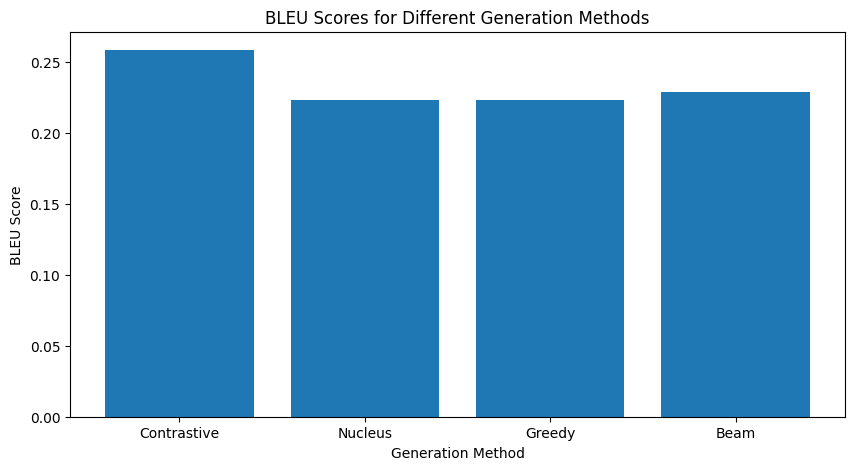

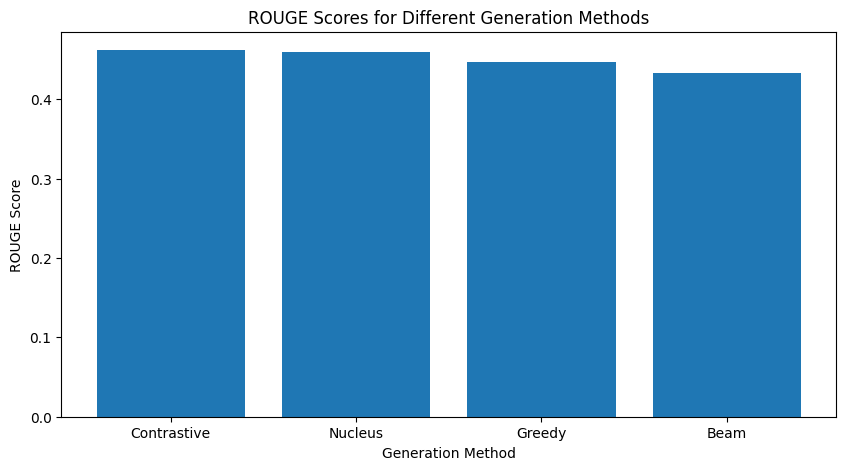

In [ ]:
# Hàm vẽ biểu đồ
def plot_scores(scores, score_name):
    methods = list(scores.keys())
    values = list(scores.values())

    plt.figure(figsize=(10, 5))
    plt.bar(methods, values)
    plt.title(f'{score_name} Scores for Different Generation Methods')
    plt.xlabel('Generation Method')
    plt.ylabel(f'{score_name} Score')
    plt.show()

# Vẽ biểu đồ BLEU và ROUGE scores
plot_scores(bleu_scores, 'BLEU')
plot_scores(rouge_scores, 'ROUGE')